In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from imutils import perspective
from imutils import contours
import imutils
import os

boardShape = (7,5)
cameraFocalLength = 0.028 #in 28mm in m
baseLine = 0.04 #2.5cm in m
imgL = cv2.imread('images/image3/left.jpg', 0)
imgR = cv2.imread('images/image3/right.jpg', 0)

# imgL = cv2.imread('images/image1/left_cam.jpg',0)
# imgR = cv2.imread('images/image1/right_cam.jpg',0)
scalePercent = 15
# plt.subplot(1,2,1)
# plt.figure(figsize = (15,15))
# plt.imshow(imgT, cmap = 'gray')
# plt.title('Original Image')

# plt.subplot(1,2,2)
# plt.figure(figsize = (15,15))
# plt.imshow(downL, cmap='gray')



In [32]:
def calibrate():
    imgpoints = []
    objpoints = []
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    objp = np.zeros((1, boardShape[0] * boardShape[1], 3), np.float32)
    objp[0,:,:2] = np.mgrid[0:boardShape[0], 0:boardShape[1]].T.reshape(-1, 2)
    for filename in os.listdir("images/calibrator2"):
        if (filename.find(".jpg") != -1):
            
            img = cv2.imread(os.path.join("images/calibrator2",filename))
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            ret, corners = cv2.findChessboardCorners(gray, boardShape, 
                                                     cv2.CALIB_CB_ADAPTIVE_THRESH + 
                                                     cv2.CALIB_CB_FAST_CHECK + 
                                                     cv2.CALIB_CB_NORMALIZE_IMAGE)
            if ret == True:
                print(filename)
                objpoints.append(objp)
                corners2 = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
                imgpoints.append(corners)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    return mtx, dist

In [33]:
result = calibrate()

IMG_6738.jpg
IMG_6772.jpg
IMG_6774.jpg
IMG_6785.jpg
IMG_6780.jpg
IMG_6768.jpg
IMG_6727.jpg
IMG_6733.jpg
IMG_6734.jpg
IMG_6736.jpg


In [222]:
#np.save("./camera/mtx", result[0])
#np.save("./camera/dist", result[1])
#print(result)
cameraDistort = np.load('./camera/mtx.npy'), np.load('./camera/dist.npy')
#print(result2)

In [5]:
def resize(img):
    return cv2.resize(img, (int(img.shape[1] * scalePercent / 100), 
                                int(img.shape[0] * scalePercent / 100)),
                               interpolation = cv2.INTER_AREA)

In [9]:
resizedImgL = resize(imgL)
resizedImgR = resize(imgR)

In [19]:
def downSample(image, times = 1):
    for i in range(0,times):
        image = cv2.pyrDown(image)
    return image

In [11]:
def getCountours(image, dx, dy):
    image = cv2.Canny(image, dx, dy)
    image = cv2.dilate(image, None, iterations=1)
    image = cv2.erode(image, None, iterations=1)
    toReturn = cv2.findContours(image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    toReturn = imutils.grab_contours(toReturn)
    plt.figure(figsize = (10,10))
    plt.imshow(image, cmap = 'gray')
    return toReturn

In [9]:
def getCameraMatrix(image):
    h,  w = image.shape[:2]
    newCameraMtx, roi = cv2.getOptimalNewCameraMatrix(result[0], result[1], (w,h), 1, (w,h))
    return newCameraMtx, roi

In [3]:
points = [] 
def drawAreaToMeasure(event, x, y, flags, param): 
    # grab references to the global variables 
    global points
  
    # if the left mouse button was clicked, record the starting 
    # (x, y) coordinates and indicate that cropping is being performed 
    if event == cv2.EVENT_LBUTTONDOWN: 
        points = [(x, y)] 
  
    # check to see if the left mouse button was released 
    elif event == cv2.EVENT_LBUTTONUP: 
        # record the ending (x, y) coordinates and indicate that 
        # the cropping operation is finished 
        points.append((x, y)) 
  
        # draw a rectangle around the region of interest 
        cv2.rectangle(image, points[0], points[1], (0, 255, 0), 2)
        print(points[0], points[1])
        cv2.imshow("image", image)

In [16]:
# load the image, clone it, and setup the mouse callback function 
image = cv2.imread("images/test.jpg",0)
image = resize(disp_Color)
clone = image.copy() 
cv2.namedWindow("image") 
cv2.setMouseCallback("image", drawAreaToMeasure) 
 
# keep looping until the 'q' key is pressed 
while True: 
    # display the image and wait for a keypress 
    cv2.imshow("image", image) 
    key = cv2.waitKey(1) & 0xFF
  
    # press 'r' to reset the window 
    if key == ord("r"): 
        image = clone.copy() 
  
    # if the 'c' key is pressed, break from the loop 
    elif key == ord("c"): 
        break
        
# close all open windows 
cv2.destroyAllWindows()  

(126, 301) (179, 309)
(126, 296) (265, 484)
(295, 209) (295, 209)


[array([[[ 73, 438]],
 
        [[ 73, 440]],
 
        [[ 75, 440]],
 
        [[ 75, 438]]], dtype=int32), array([[[363, 423]],
 
        [[362, 424]],
 
        [[363, 423]],
 
        [[365, 423]]], dtype=int32), array([[[308, 401]],
 
        [[308, 403]],
 
        [[310, 403]],
 
        [[309, 402]],
 
        [[309, 401]]], dtype=int32), array([[[427, 394]],
 
        [[427, 396]],
 
        [[429, 396]],
 
        [[429, 394]]], dtype=int32), array([[[114, 392]],
 
        [[114, 394]],
 
        [[116, 394]],
 
        [[116, 392]]], dtype=int32), array([[[388, 388]],
 
        [[388, 390]],
 
        [[389, 390]],
 
        [[390, 389]],
 
        [[390, 388]]], dtype=int32), array([[[145, 376]]], dtype=int32), array([[[274, 338]],
 
        [[273, 339]],
 
        [[271, 339]],
 
        [[270, 340]],
 
        [[266, 340]],
 
        [[265, 341]],
 
        [[263, 341]],
 
        [[262, 340]],
 
        [[262, 339]],
 
        [[259, 339]],
 
        [[259, 340]],
 
    

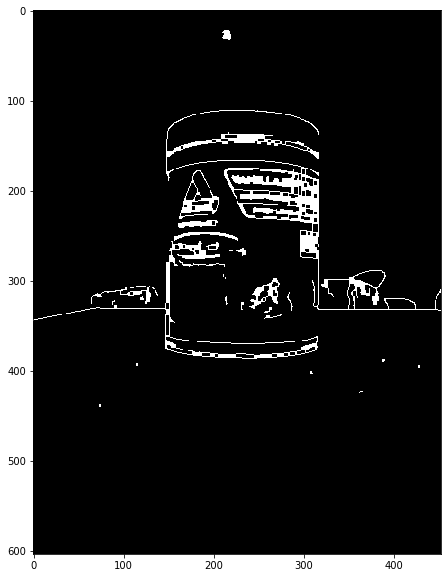

In [16]:
getCountours(imgL, 100, 50)

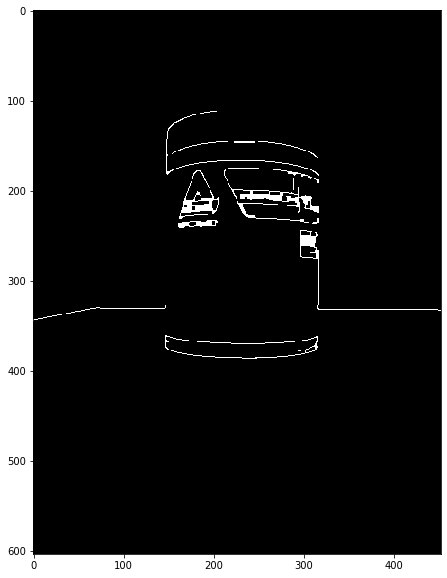

In [13]:
imgL = cv2.imread("images/image18/left.jpg",0)
imgL = resize(imgL)
countours = getCountours(imgL, 200, 500)
for c in countours:
    if cv2.contourArea(c) < 100:
        continue
#     print(c)
    orig = imgL.copy()
    box = cv2.minAreaRect(c)
    box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
    box = np.array(box, dtype="int")
    # order the points in the contour such that they appear
    # in top-left, top-right, bottom-right, and bottom-left
    # order, then draw the outline of the rotated bounding
    # box
#     box = perspective.order_points(box)
    cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
    # loop over the original points and draw them
    for (x, y) in box:
        cv2.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)
    cv2.imshow("Image", orig)
    cv2.waitKey(0)

30


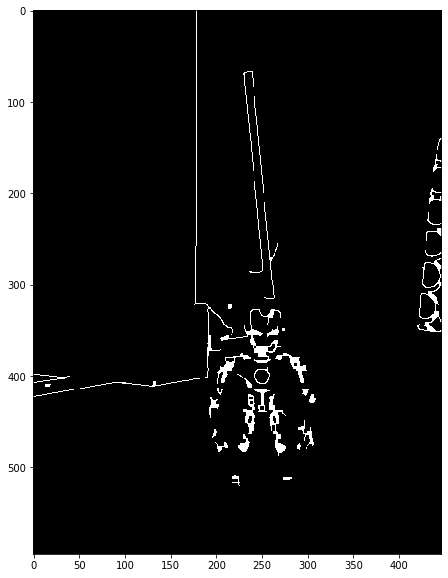

In [17]:
test = cv2.Canny(resizedImgL, 200, 500)
test = cv2.dilate(test, None, iterations=1)
test = cv2.erode(test, None, iterations=1)
cnts = cv2.findContours(test.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
plt.figure(figsize = (10,10))
plt.imshow(test, cmap = 'gray')
print(len(cnts))
for c in cnts:
    if cv2.contourArea(c) < 100:
        continue
#     print(c)
    orig = resizedImgL.copy()
    box = cv2.minAreaRect(c)
    box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
    box = np.array(box, dtype="int")
    # order the points in the contour such that they appear
    # in top-left, top-right, bottom-right, and bottom-left
    # order, then draw the outline of the rotated bounding
    # box
#     box = perspective.order_points(box)
    cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
    # loop over the original points and draw them
    for (x, y) in box:
        cv2.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)
    cv2.imshow("Image", orig)
    cv2.waitKey(0)

[[3.20223975e+03 0.00000000e+00 1.55894703e+03]
 [0.00000000e+00 3.25845703e+03 1.95685101e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]] (216, 184, 2663, 3570)


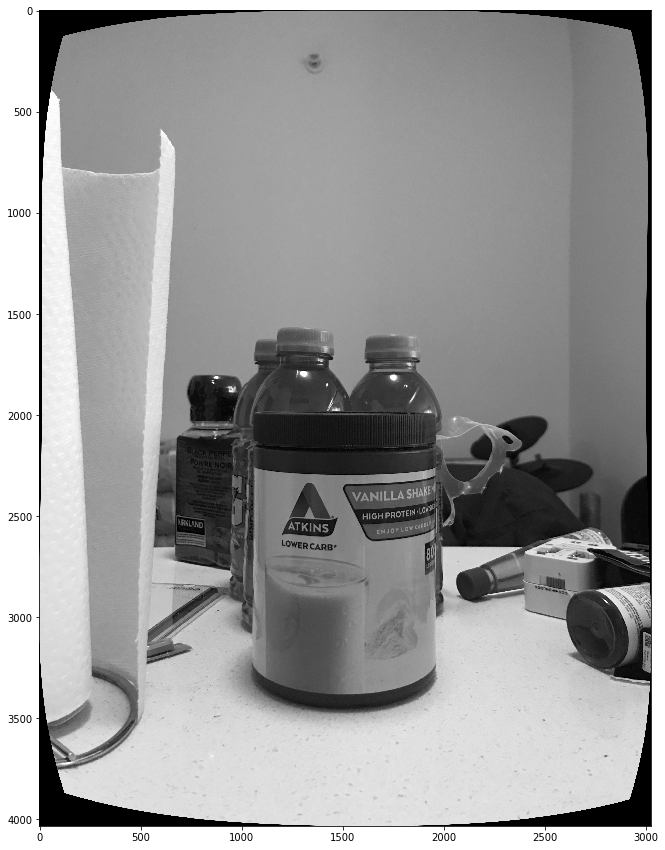

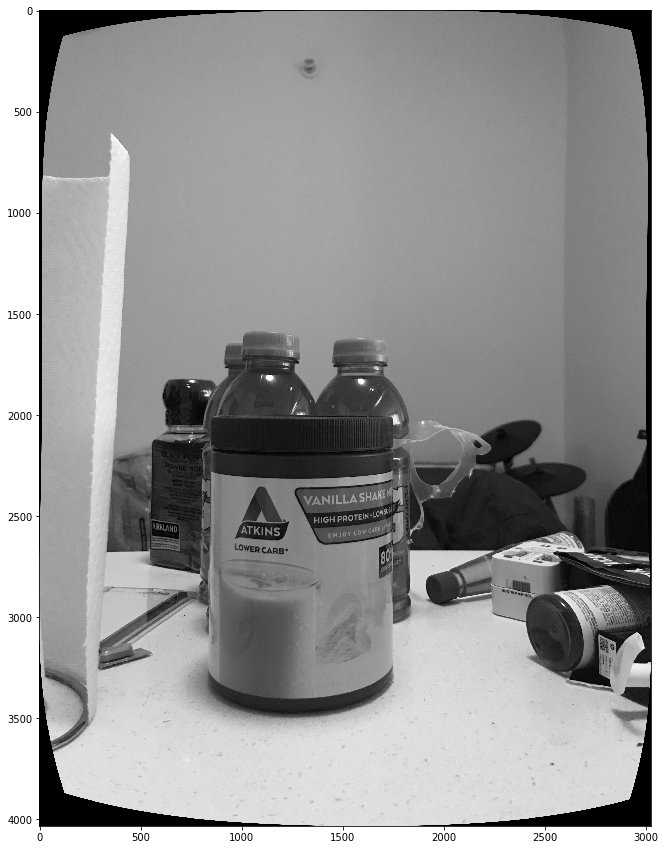

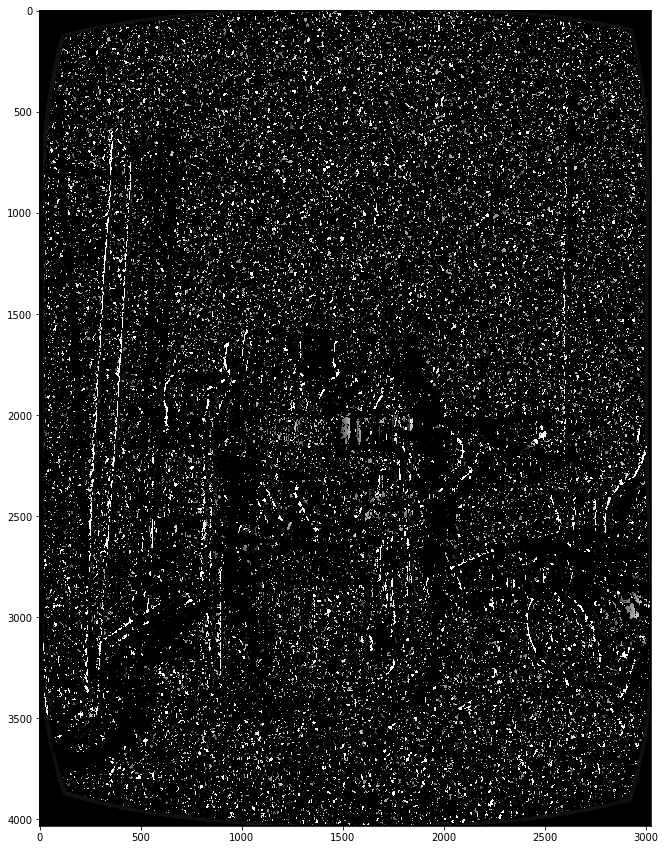

error: OpenCV(3.4.2) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/canny.cpp:947: error: (-215:Assertion failed) _src.depth() == 0 in function 'Canny'


In [37]:
# img = cv.imread('left12.jpg')
imgL = cv2.imread('images/image7/left.jpg', 0)
imgR = cv2.imread('images/image7/right.jpg', 0)
h,  w = imgL.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(result[0], result[1], (w,h), 1, (w,h))
print(newcameramtx, roi)
# undistort
flattenLeft = cv2.undistort(imgL, result[0], result[1], None, newcameramtx)
flattenRight = cv2.undistort(imgR, result[0], result[1], None, newcameramtx)
plt.figure(figsize = (15,15))
plt.imshow(flattenLeft,'gray')
plt.show()
plt.figure(figsize = (15,15))
plt.imshow(flattenRight,'gray')
plt.show()

stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
# disparity = stereo.compute(imgR,imgL)
disparity = stereo.compute(flattenLeft,flattenRight)
plt.figure(figsize = (15,15))
plt.imshow(disparity,'gray')
plt.show()
# print(disparity.depth())
# test = cv2.Canny(disparity, 200, 500)
# test = cv2.dilate(test, None, iterations=1)
# test = cv2.erode(test, None, iterations=1)


print(flattenLeft.shape)
print(flattenRight.shape)
print(flattenLeft[2000][1000])
print(imgL[2000][1000])
# plt.figure(figsize = (15,15))
# plt.imshow(flattenLeft, cmap = 'gray')
# plt.title('Original Image')
# crop the image
# x, y, w, h = roi
# dst = dst[y:y+h, x:x+w]
# plt.figure(figsize = (15,15))
# print(dst)
# plt.imshow(dst, cmap = 'gray')
# plt.title('Original Image')
#     cv2.imwrite('calibresult.png', dst)

In [77]:
imgL = cv2.imread('images/image8/left.png', 0)
imgR = cv2.imread('images/image8/right.png', 0)
stereo = cv2.StereoBM_create(numDisparities=96, blockSize=21)
disparity = stereo.compute(imgL,imgR)
# test = cv2.reprojectImageTo3D(disparity, Q=)
plt.figure(figsize = (15,15))
plt.imshow(disparity,'gray')
plt.show()

TypeError: reprojectImageTo3D() missing required argument 'Q' (pos 2)

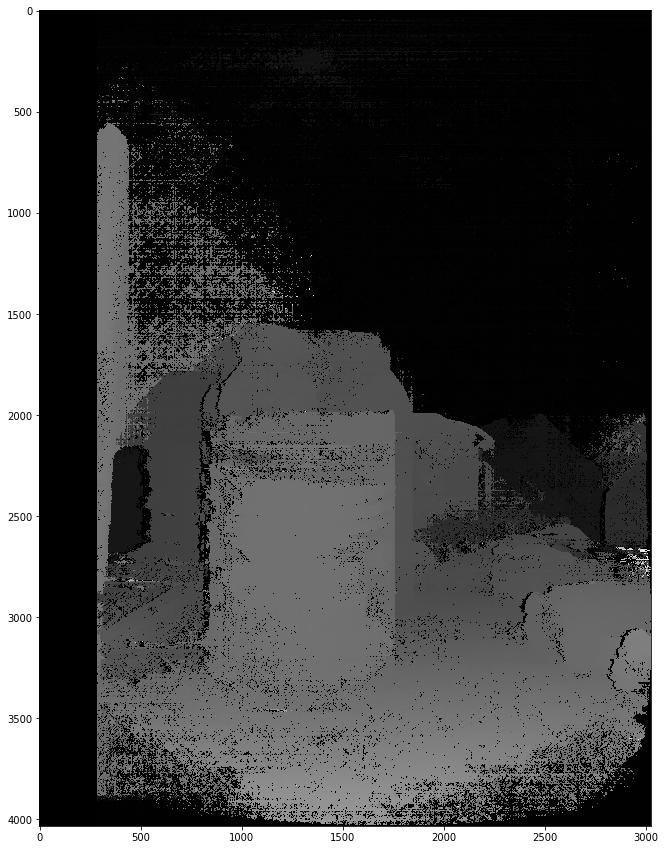

(4032, 3024)


In [326]:
imgL = cv2.imread('images/image10/left.jpeg', 0)
imgR = cv2.imread('images/image10/middle.jpeg', 0)

newcameramtx = getCameraMatrix(imgL)

undistortedL = cv2.undistort(imgL, result[0], result[1], None, newcameramtx[0])
undistortedR = cv2.undistort(imgR, result[0], result[1], None, newcameramtx[0])
# plt.figure(figsize = (15,15))
# plt.imshow(undistortedL,'gray')
# plt.show()
# plt.figure(figsize = (15,15))
# plt.imshow(undistortedR,'gray')
# plt.show()

# downL = downsample_image(img_1_undistorted,3)
# downR = downsample_image(img_2_undistorted,3)
win_size = 8
min_disp = -1
max_disp = 287 #min_disp * 9
num_disp = max_disp - min_disp # Needs to be divisible by 16
#Create Block matching object. 
stereo = cv2.StereoSGBM_create(minDisparity= min_disp,
 numDisparities = num_disp,
 blockSize = 5,
 uniquenessRatio = 2,
 speckleWindowSize = 5,
 speckleRange = 5,
 disp12MaxDiff = -1,
 P1 = 8*3*win_size**2,#8*3*win_size**2,
 P2 =32*3*win_size**2) #32*3*win_size**2)

stereoResult = stereo.compute(undistortedL, undistortedR)
plt.figure(figsize = (15,15))
plt.imshow(stereoResult,'gray')
plt.show()
print(stereoResult.shape)

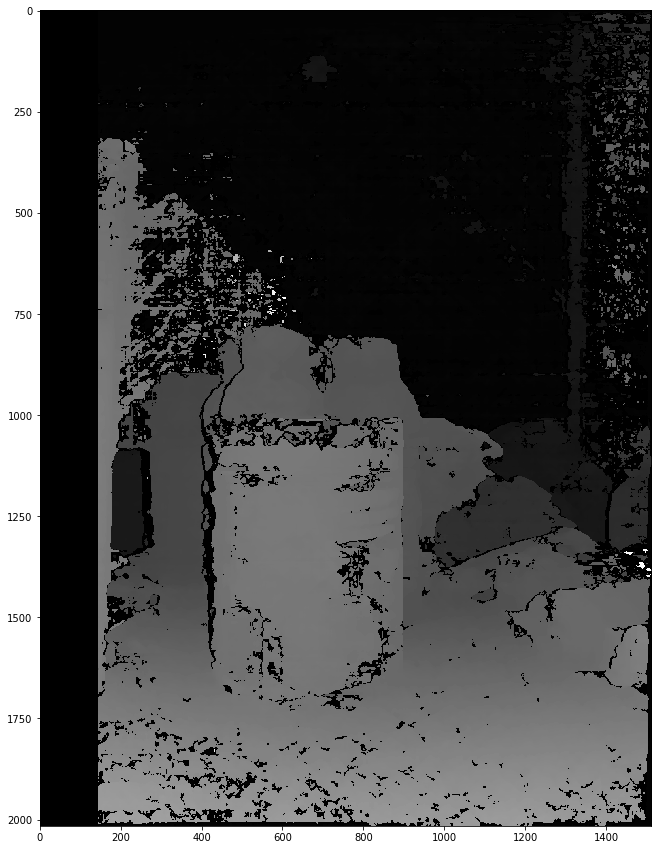

In [322]:
imgL = cv2.imread('images/image10/left.jpeg', 0)
imgR = cv2.imread('images/image10/middle.jpeg', 0)

imgL = downSample(imgL, 1)
imgR = downSample(imgR, 1)

newcameramtx = getCameraMatrix(imgL)

undistortedL = cv2.undistort(imgL, result[0], result[1], None, newcameramtx[0])
undistortedR = cv2.undistort(imgR, result[0], result[1], None, newcameramtx[0])
# plt.figure(figsize = (15,15))
# plt.imshow(undistortedL,'gray')
# plt.show()
# plt.figure(figsize = (15,15))
# plt.imshow(undistortedR,'gray')
# plt.show()

# tImgL = downSample(undistortedL, 1)
# tImgR = downSample(undistortedR, 1)

win_size = 5
min_disp = -1
max_disp = 143 #min_disp * 9
num_disp = max_disp - min_disp # Needs to be divisible by 16
#Create Block matching object. 
stereo = cv2.StereoSGBM_create(minDisparity= min_disp,
 numDisparities = num_disp,
 blockSize = 13,
 uniquenessRatio = 11,
#  speckleWindowSize = 5,
#  speckleRange = 5,
 disp12MaxDiff = -1,
 P1 = 4*8*3*win_size**2,#8*3*win_size**2,
 P2 =4*32*3*win_size**2) #32*3*win_size**2)

stereoResult = stereo.compute(undistortedL, undistortedR)
# stereoResult = stereo.compute(tImgL, tImgR)
plt.figure(figsize = (15,15))
plt.imshow(stereoResult,'gray')
plt.show()
# print(stereoResult[2499][1499])

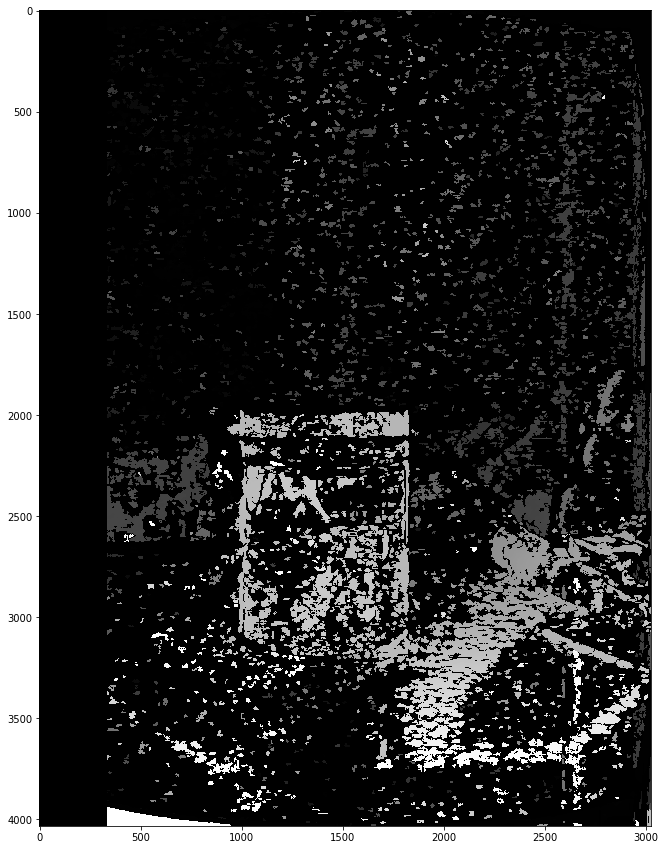

In [200]:
imgL = cv2.imread('images/image12/left.jpg', 0)
imgR = cv2.imread('images/image12/right.jpg', 0)

# imgL = downSample(imgL, 1)
# imgR = downSample(imgR, 1)
cameraMtx = getCameraMatrix(imgL)

undistortedL = cv2.undistort(imgL, result[0], result[1], None, cameraMtx[0])
undistortedR = cv2.undistort(imgR, result[0], result[1], None, cameraMtx[0])
# plt.figure(figsize = (15,15))
# plt.imshow(undistortedL,'gray')
# plt.show()
# plt.figure(figsize = (15,15))
# plt.imshow(undistortedR,'gray')
# plt.show()

# tImgL = downSample(undistortedL, 1)
# tImgR = downSample(undistortedR, 1)

win_size = 10
min_disp = -1
# max_disp = 95 #min_disp * 9
# num_disp = max_disp - min_disp # Needs to be divisible by 16
num_disp = 336
#Create Block matching object. 
stereo = cv2.StereoSGBM_create(
    minDisparity= min_disp,
    numDisparities = num_disp,
#     blockSize = 23,
    blockSize = 21,
    uniquenessRatio = 20,
    speckleWindowSize = 150,
    speckleRange = 200,
    disp12MaxDiff = 12,
    preFilterCap = 4,
#     P1 = 600,
#     P2 = 2400
# )
 P1 = 8*3*win_size**2,#8*3*win_size**2,
 P2 = 32*3*win_size**2) #32*3*win_size**2)

stereoResult = stereo.compute(undistortedL, undistortedR)
# stereoResult = stereo.compute(tImgL, tImgR)
plt.figure(figsize = (15,15))
plt.imshow(stereoResult,'gray')
plt.show()

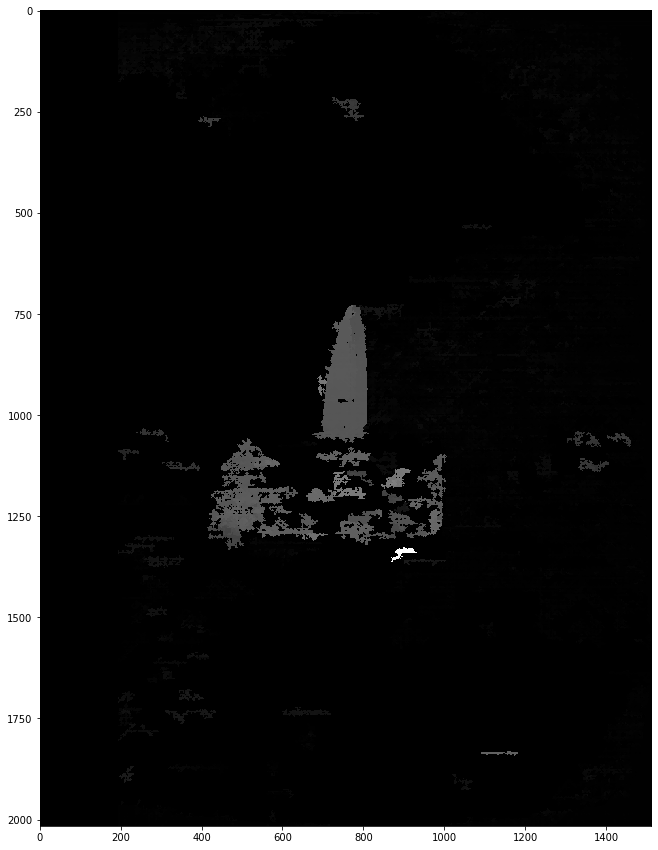

In [471]:
imgL = cv2.imread('images/image15/left.jpg', 0)
imgR = cv2.imread('images/image15/right.jpg', 0)

# imgL = downSample(imgL, 1)
# imgR = downSample(imgR, 1)

undistortedL = cv2.undistort(imgL, result[0], result[1], None, newcameramtx)
undistortedR = cv2.undistort(imgR, result[0], result[1], None, newcameramtx)
# plt.figure(figsize = (15,15))
# plt.imshow(undistortedL,'gray')
# plt.show()
# plt.figure(figsize = (15,15))
# plt.imshow(undistortedR,'gray')
# plt.show()

tImgL = downSample(undistortedL, 1)
tImgR = downSample(undistortedR, 1)

win_size = 5
min_disp = 0
# max_disp = 32 #min_disp * 9
num_disp = 192 # Needs to be divisible by 16
#Create Block matching object. 
stereo = cv2.StereoSGBM_create(minDisparity= min_disp,
 numDisparities = num_disp,
 blockSize = 5,
 uniquenessRatio = 1,
 speckleWindowSize = 500,
 speckleRange = 2,
 disp12MaxDiff = 10,
 P1 = 8*3*win_size**2,#8*3*win_size**2,
 P2 =32*3*win_size**2) #32*3*win_size**2)

# stereoResult = stereo.compute(undistortedL, undistortedR)
stereoResult = stereo.compute(tImgL, tImgR)
plt.figure(figsize = (15,15))
plt.imshow(stereoResult,'gray')
plt.show()
# print(stereoResult[2499][1499])

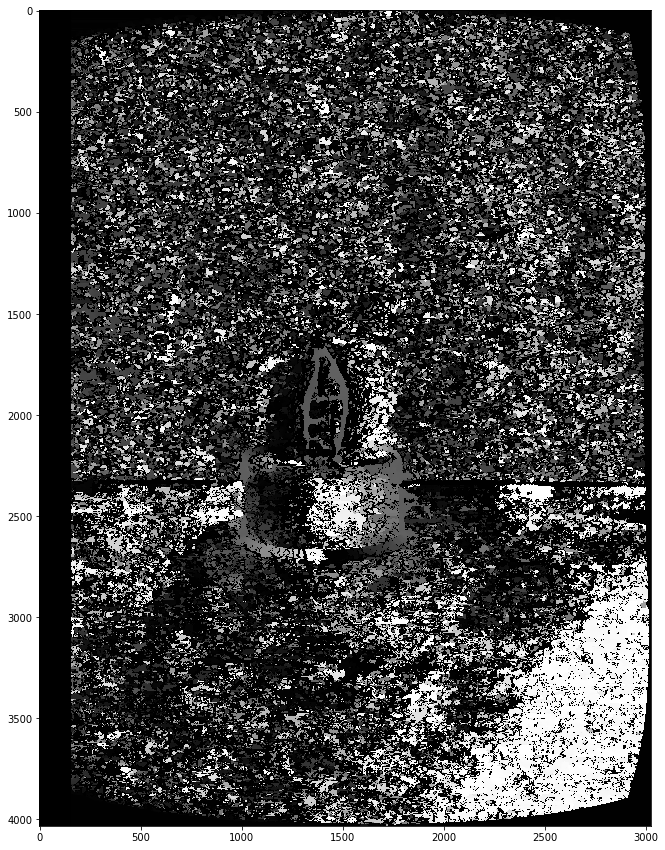

In [583]:
imgL = cv2.imread('images/image16/left.jpg', 0)
imgR = cv2.imread('images/image16/right.jpg', 0)

# imgL = downSample(imgL, 1)
# imgR = downSample(imgR, 1)

undistortedL = cv2.undistort(imgL, result[0], result[1], None, newcameramtx)
undistortedR = cv2.undistort(imgR, result[0], result[1], None, newcameramtx)
# plt.figure(figsize = (15,15))
# plt.imshow(undistortedL,'gray')
# plt.show()
# plt.figure(figsize = (15,15))
# plt.imshow(undistortedR,'gray')
# plt.show()

tImgL = downSample(undistortedL, 1)
tImgR = downSample(undistortedR, 1)

win_size = 5
min_disp = 0
# max_disp = 32 #min_disp * 9
num_disp = 160 # Needs to be divisible by 16
#Create Block matching object. 
stereo = cv2.StereoSGBM_create(minDisparity= min_disp,
 numDisparities = num_disp,
#  blockSize = 15,
blockSize = 21,
#  uniquenessRatio = 11,
 uniquenessRatio = 5,
                               speckleWindowSize = 10,
 speckleRange = 1,
 disp12MaxDiff = -1,
 P1 = 3*8*3*win_size**2,#8*3*win_size**2,
 P2 = 3*32*3*win_size**2) #32*3*win_size**2)

stereoResult = stereo.compute(undistortedL, undistortedR)
# stereoResult = stereo.compute(tImgL, tImgR)
plt.figure(figsize = (15,15))
plt.imshow(stereoResult,'gray')
plt.show()
# print(stereoResult[2499][1499])

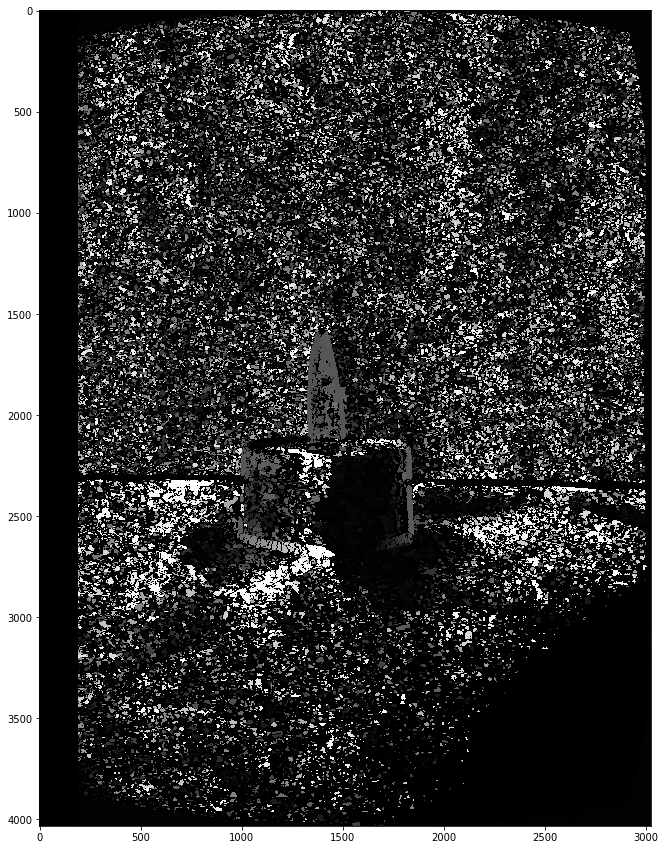

In [136]:
imgL = cv2.imread('images/image17/left.jpg', 0)
imgR = cv2.imread('images/image17/right.jpg', 0)

cameraMtx = getCameraMatrix(imgL)

# imgL = downSample(imgL, 1)
# imgR = downSample(imgR, 1)

undistortedL = cv2.undistort(imgL, result[0], result[1], None, cameraMtx[0])
undistortedR = cv2.undistort(imgR, result[0], result[1], None, cameraMtx[0])
# plt.figure(figsize = (15,15))
# plt.imshow(undistortedL,'gray')
# plt.show()
# plt.figure(figsize = (15,15))
# plt.imshow(undistortedR,'gray')
# plt.show()

tImgL = downSample(undistortedL, 1)
tImgR = downSample(undistortedR, 1)

win_size = 5
min_disp = -1
max_disp = 191 #min_disp * 9
num_disp = max_disp - min_disp # Needs to be divisible by 16
#Create Block matching object. 
stereo = cv2.StereoSGBM_create(minDisparity= min_disp,
 numDisparities = num_disp,
 blockSize = 21,
 uniquenessRatio = 9,
 speckleWindowSize = 15,
 speckleRange = 52,
 disp12MaxDiff = 1,
 P1 = 8*3*win_size**2,
 P2 = 32*3*win_size**2)

# stereo = cv2.StereoBM_create(numDisparities=96, blockSize=5)

stereoResult = stereo.compute(undistortedL, undistortedR)
# stereoResult = stereo.compute(tImgL, tImgR)
plt.figure(figsize = (15,15))
plt.imshow(stereoResult,'gray')
plt.show()
# print(stereoResult[2499][1499])

(4032, 3024)
(604, 453, 3)


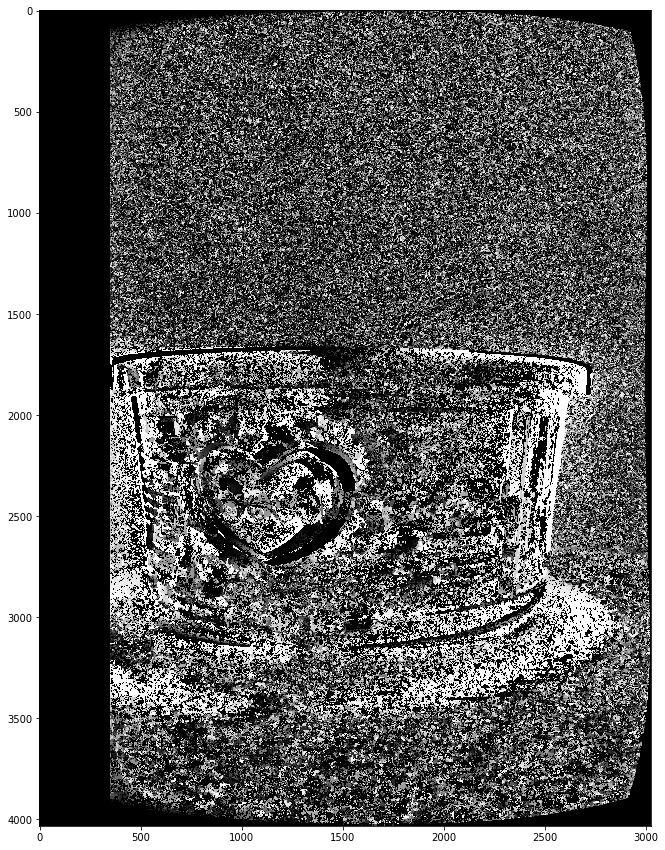

In [320]:
imgL = cv2.imread('images/image19/left.jpg')
imgR = cv2.imread('images/image19/right.jpg')
# imgL = resize(imgL)
# imgR = resize(imgR)

cameraMtx = getCameraMatrix(imgL)

# imgL = downSample(imgL, 1)
# imgR = downSample(imgR, 1)

undistortedL = cv2.undistort(imgL, result[0], result[1], None, cameraMtx[0])
undistortedR = cv2.undistort(imgR, result[0], result[1], None, cameraMtx[0])

# undistortedL = resize(undistortedL)
# undistortedR = resize(undistortedR)
# plt.figure(figsize = (15,15))
# plt.imshow(undistortedL,'gray')
# plt.show()
# plt.figure(figsize = (15,15))
# plt.imshow(undistortedR,'gray')
# plt.show()

# tImgL = downSample(undistortedL, 1)
# tImgR = downSample(undistortedR, 1)

# win_size = 8
# min_disp = -15
# max_disp = 336 #min_disp * 9
# num_disp = max_disp - min_disp # Needs to be divisible by 16
# #Create Block matching object. 
# stereo = cv2.StereoSGBM_create(minDisparity= min_disp,
#  numDisparities = max_disp,
#  blockSize = 19,
# #  uniquenessRatio = 3,
# #  speckleWindowSize = 10,
# #  speckleRange = 250,
#  disp12MaxDiff = -1,
#  P1 = 35*win_size**2,
#  P2 = 75*3*win_size**2)

# win_size = 8
# min_disp = -15
# max_disp = 256 #min_disp * 9
# num_disp = max_disp - min_disp # Needs to be divisible by 16
# #Create Block matching object. 
# stereo = cv2.StereoSGBM_create(minDisparity= min_disp,
#  numDisparities = max_disp,
#  blockSize = 9,
#  uniquenessRatio = 11,
#  speckleWindowSize = 50,
#  speckleRange = 50,
#  disp12MaxDiff = 1,
#  P1 = 35*win_size**2,
#  P2 = 75*win_size**2)

win_size = 8
min_disp = -15
max_disp = 352 #min_disp * 9 544
num_disp = max_disp - min_disp # Needs to be divisible by 16
#Create Block matching object. 
stereo = cv2.StereoSGBM_create(
#     minDisparity= min_disp,
 numDisparities = max_disp,
 blockSize = 13,)
#  uniquenessRatio = 2,)
#  speckleWindowSize = 5,
#  speckleRange = 5)
#  disp12MaxDiff = 1,
#  P1 = 35*win_size**2,
#  P2 = 75*win_size**2)

# stereo = cv2.StereoBM_create(numDisparities=288, blockSize=11)

stereoResult = stereo.compute(undistortedL, undistortedR)
print(stereoResult.shape)
print(resize(imgL).shape)
# stereoResult = stereo.compute(tImgL, tImgR)
plt.figure(figsize = (15,15))
plt.imshow(stereoResult,'gray')
plt.show()
# print(stereoResult[2499][1499])

(2016, 1512)
(604, 453, 3)


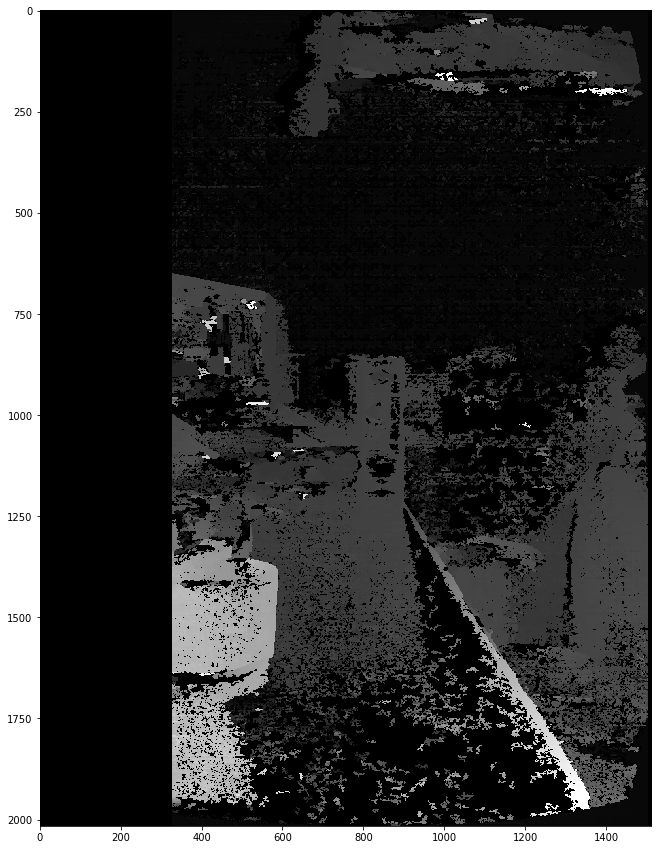

In [221]:
imgL = cv2.imread('images/train/115/left.jpg')
imgR = cv2.imread('images/train/115/right.jpg')
# imgL = resize(imgL)
# imgR = resize(imgR)

cameraMtx = getCameraMatrix(imgL)

# imgL = downSample(imgL, 1)
# imgR = downSample(imgR, 1)

undistortedL = cv2.undistort(imgL, result[0], result[1], None, cameraMtx[0])
undistortedR = cv2.undistort(imgR, result[0], result[1], None, cameraMtx[0])

undistortedL = downSample(undistortedL, 1)
undistortedR = downSample(undistortedR, 1)

# win_size = 7
# min_disp = 2
# max_disp = 322 #min_disp * 9
# num_disp = max_disp - min_disp # Needs to be divisible by 16
# #Create Block matching object. 
# stereo = cv2.StereoSGBM_create(minDisparity= min_disp,
#  numDisparities = num_disp,
#  blockSize = win_size,
#  uniquenessRatio = 10,
#  speckleWindowSize = 100,
#  speckleRange = 32,
#  disp12MaxDiff = 5,
#  P1 = 8*3*win_size**2,#8*3*win_size**2,
#  P2 =32*3*win_size**2) #32*3*win_size**2)

# working for dist 25
# win_size = 1
# min_disp = 2
# max_disp = 370 #min_disp * 9
# num_disp = max_disp - min_disp # Needs to be divisible by 16
# #Create Block matching object. 
# stereo = cv2.StereoSGBM_create(minDisparity= min_disp,
#  numDisparities = num_disp,
#  blockSize = win_size,
#  uniquenessRatio = 1,
#  speckleWindowSize = 200,
#  speckleRange = 64,
#  disp12MaxDiff = 5,
#  P1 = 8*3*win_size**2,#8*3*win_size**2,
#  P2 =32*3*win_size**2) #32*3*win_size**2)


win_size = 5 #3
min_disp = -10
max_disp = 326 #min_disp * 9
num_disp = max_disp - min_disp # Needs to be divisible by 16
#Create Block matching object. 
stereo = cv2.StereoSGBM_create(minDisparity= min_disp,
 numDisparities = num_disp,
 blockSize = win_size,
 uniquenessRatio = 3,
 speckleWindowSize = 100,
 speckleRange = 32,
 disp12MaxDiff = 5,
 P1 = 8*3*win_size**2,#8*3*win_size**2,
 P2 =32*3*win_size**2) #32*3*win_size**2)





stereoResult = stereo.compute(undistortedL, undistortedR)
print(stereoResult.shape)
print(resize(imgL).shape)
# stereoResult = stereo.compute(tImgL, tImgR)
plt.figure(figsize = (15,15))
plt.imshow(stereoResult,'gray')
plt.show()

In [349]:
while True:
    cv2.imshow("image", resize(stereoResult))
    if cv2.waitKey(1) & 0xFF == ord(' '):
        break

In [352]:
print(stereoResult[2999][1400])

2081


In [ ]:
def getDisparity(imageLeft, imageRight):
    cameraMtx = getCameraMatrix(imageLeft)
    undistortedL = cv2.undistort(imageLeft, cameraDistort[0], cameraDistort[1], None, cameraMtx[0])
    undistortedR = cv2.undistort(imageRight, cameraDistort[0], cameraDistort[1], None, cameraMtx[0])

    undistortedL = downSample(undistortedL, 1)
    undistortedR = downSample(undistortedR, 1)

In [220]:
folderName =  "images/train"
for folder in os.listdir(folderName):
    if (folder.isdigit()):
        distFolder = os.path.join(folderName, folder)
        print(distFolder)
        print(os.listdir(distFolder))
        imgL = cv2.imread(os.path.join(distFolder, 'left.jpg'))
        imgR = cv2.imread(os.path.join(distFolder, 'right.jpg'))
#         for photo in os.listdir(distFolder):
#             if (photo.find(".jpg") != -1):
#                 print(photo)
#     if (filename.find(".jpg") != -1):
#             image = cv2.imread(os.path.join(folderName,filename))
#             if (image is not None):
#                 imageHist = calculateHistogram(image)
#                 if (mode == 0):
#                     xTrain.append(imageHist)
#                     yTrain.append(label)
#                 else:
#                     originalTestImages.append(image)
#                     xTest.append(imageHist)
#                     yTest.append(label)
#             else:
#                 print("Failed to read " + filename)

images/train/61
['.DS_Store', 'left.jpg', 'right.jpg']
images/train/95
['.DS_Store', 'left.jpg', 'right.jpg']
images/train/105
['.DS_Store', 'left.jpg', 'right.jpg']
images/train/58
['.DS_Store', 'left.jpg', 'right.jpg']
images/train/67
['.DS_Store', 'left.jpg', 'right.jpg']
images/train/34
['.DS_Store', 'left.jpg', 'right.jpg']
images/train/73
['.DS_Store', 'left.jpg', 'right.jpg']
images/train/28
['.DS_Store', 'left.jpg', 'right.jpg']
images/train/110
['.DS_Store', 'left.jpg', 'right.jpg']
images/train/43
['.DS_Store', 'left.jpg', 'right.jpg']
images/train/31
['.DS_Store', 'left.jpg', 'right.jpg']
images/train/100
['.DS_Store', 'left.jpg', 'right.jpg']
images/train/37
['.DS_Store', 'left.jpg', 'right.jpg']
images/train/52
['.DS_Store', 'left.jpg', 'right.jpg']
images/train/55
['.DS_Store', 'left.jpg', 'right.jpg']
images/train/64
['.DS_Store', 'left.jpg', 'right.jpg']
images/train/90
['.DS_Store', 'left.jpg', 'right.jpg']
images/train/46
['.DS_Store', 'left.jpg', 'right.jpg']
images/

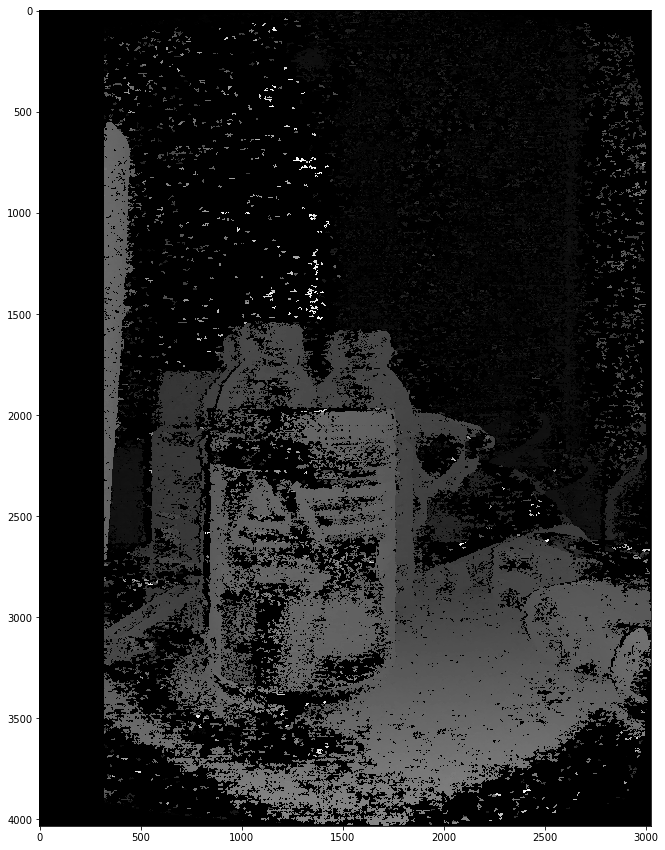

In [17]:
kernel= np.ones((3,3),np.uint8)
closing= cv2.morphologyEx(stereoResult,cv2.MORPH_CLOSE, kernel)
dispc= (closing-closing.min())*255
dispC= dispc.astype(np.uint8)                                   # Convert the type of the matrix from float32 to uint8, this way you can show the results with the function cv2.imshow()
disp_Color= cv2.applyColorMap(dispC,cv2.COLORMAP_OCEAN)         # Change the Color of the Picture into an Ocean Color_Map
# filt_Color= cv2.applyColorMap(filteredImg,cv2.COLORMAP_OCEAN)
plt.figure(figsize = (15,15))
plt.imshow(closing,'gray')
plt.show()

In [ ]:
imgL = cv2.imread('images/image18/left.jpg', 0)
imgR = cv2.imread('images/image18/right.jpg', 0)

cameraMtx = getCameraMatrix(imgL)

# imgL = downSample(imgL, 1)
# imgR = downSample(imgR, 1)

undistortedL = cv2.undistort(imgL, result[0], result[1], None, cameraMtx[0])
undistortedR = cv2.undistort(imgR, result[0], result[1], None, cameraMtx[0])
# plt.figure(figsize = (15,15))
# plt.imshow(undistortedL,'gray')
# plt.show()
# plt.figure(figsize = (15,15))
# plt.imshow(undistortedR,'gray')
# plt.show()

tImgL = downSample(undistortedL, 1)
tImgR = downSample(undistortedR, 1)

# win_size = 5
# min_disp = -10
# max_disp = 640 #min_disp * 9 592
# num_disp = max_disp - min_disp # Needs to be divisible by 16
# #Create Block matching object. 
# stereo = cv2.StereoSGBM_create(minDisparity= min_disp,
#  numDisparities = max_disp,
#  blockSize = 4,
#  uniquenessRatio = 12,
#  speckleWindowSize = 500,
#  speckleRange = 350,
#  disp12MaxDiff = 1,
#  P1 = 8*3*win_size**2,
#  P2 = 32*3*win_size**2)


# win_size = 5
# min_disp = -10
# max_disp = 288 #min_disp * 9 592
# num_disp = max_disp - min_disp # Needs to be divisible by 16
# #Create Block matching object. 
# stereo = cv2.StereoSGBM_create(minDisparity= min_disp,
#  numDisparities = max_disp,
#  blockSize = 21,
#  uniquenessRatio = 1,
#  speckleWindowSize = 150,
#  speckleRange = 30,
#  disp12MaxDiff = 1,
#  P1 = 8*3*win_size**2,
#  P2 = 32*3*win_size**2)

stereo = cv2.StereoBM_create(numDisparities=592, blockSize=5)

stereoResult = stereo.compute(undistortedL, undistortedR)
# stereoResult = stereo.compute(tImgL, tImgR)
plt.figure(figsize = (15,15))
plt.imshow(stereoResult,'gray')
plt.show()
# print(stereoResult[2499][1499])

[[-256 -256 -256 ... -256 -256 -256]
 [-256 -256 -256 ... -256 -256 -256]
 [-256 -256 -256 ... -256 -256 -256]
 ...
 [-256 -256 -256 ... -256 -256 -256]
 [-256 -256 -256 ... -256 -256 -256]
 [-256 -256 -256 ... -256 -256 -256]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


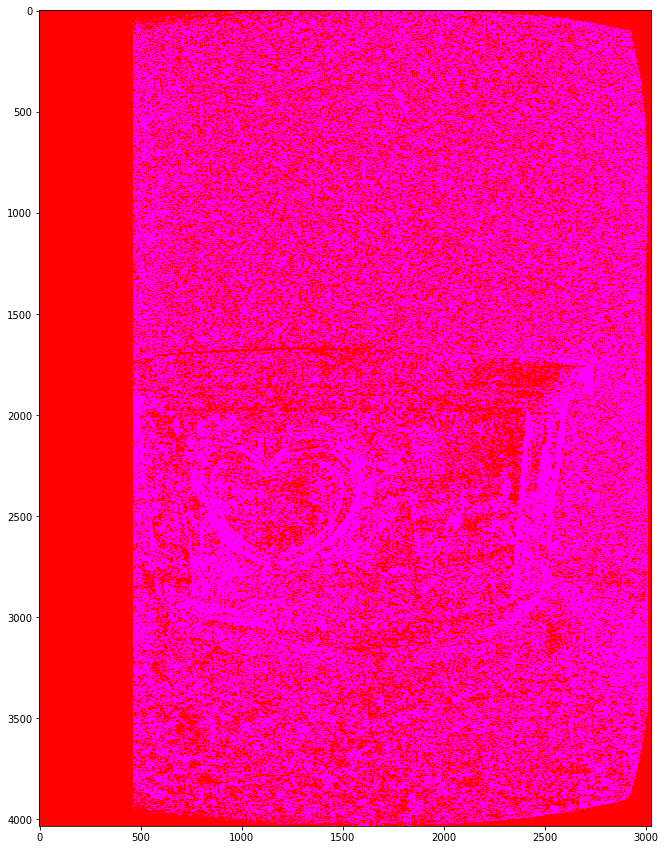

[[[ 0.000e+00  0.000e+00 -7.168e+00]
  [ 1.000e+00  0.000e+00 -7.168e+00]
  [ 2.000e+00  0.000e+00 -7.168e+00]
  ...
  [ 3.021e+03  0.000e+00 -7.168e+00]
  [ 3.022e+03  0.000e+00 -7.168e+00]
  [ 3.023e+03  0.000e+00 -7.168e+00]]

 [[ 0.000e+00 -2.000e+00 -7.168e+00]
  [ 1.000e+00 -2.000e+00 -7.168e+00]
  [ 2.000e+00 -2.000e+00 -7.168e+00]
  ...
  [ 3.021e+03 -2.000e+00 -7.168e+00]
  [ 3.022e+03 -2.000e+00 -7.168e+00]
  [ 3.023e+03 -2.000e+00 -7.168e+00]]

 [[ 0.000e+00 -4.000e+00 -7.168e+00]
  [ 1.000e+00 -4.000e+00 -7.168e+00]
  [ 2.000e+00 -4.000e+00 -7.168e+00]
  ...
  [ 3.021e+03 -4.000e+00 -7.168e+00]
  [ 3.022e+03 -4.000e+00 -7.168e+00]
  [ 3.023e+03 -4.000e+00 -7.168e+00]]

 ...

 [[ 0.000e+00 -4.026e+03 -7.168e+00]
  [ 1.000e+00 -4.026e+03 -7.168e+00]
  [ 2.000e+00 -4.026e+03 -7.168e+00]
  ...
  [ 3.021e+03 -4.026e+03 -7.168e+00]
  [ 3.022e+03 -4.026e+03 -7.168e+00]
  [ 3.023e+03 -4.026e+03 -7.168e+00]]

 [[ 0.000e+00 -4.028e+03 -7.168e+00]
  [ 1.000e+00 -4.028e+03 -7.168e+00]


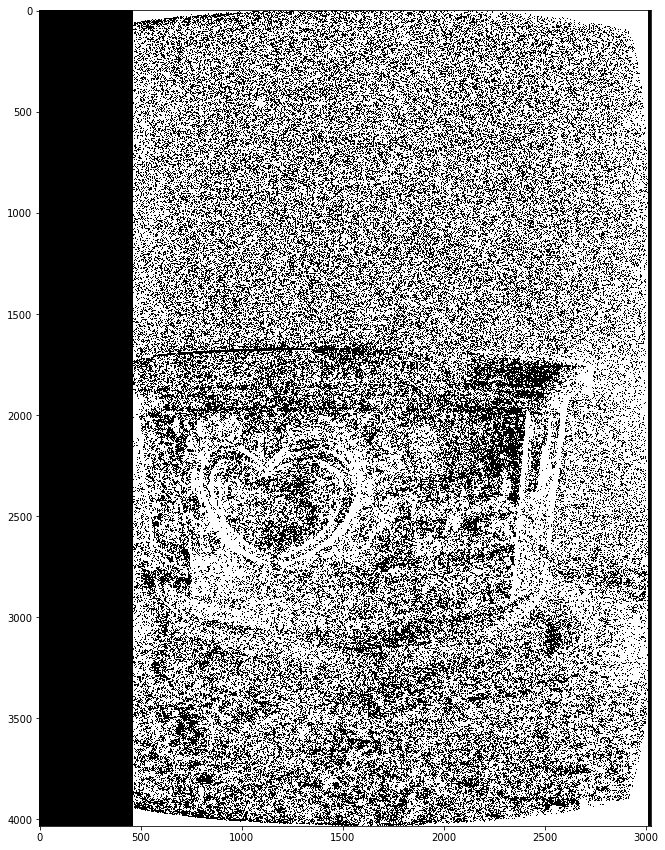

In [309]:
Q2 = np.float32([[1,0,0,0],
    [0,-1,0,0],
    [0,0,cameraFocalLength,0], #Focal length multiplication obtained experimentally. 
    [0,0,0,1]])

h,  w = imgL.shape[:2]
Q = np.float32([[1,0,0,-w/2.0],
    [0,-1,0,h/2.0],
    [0,0,0,-cameraFocalLength],
    [0,0,1,0]])


print(stereoResult)
points_3D = cv2.reprojectImageTo3D(stereoResult, Q2)
with open('test.txt', 'w') as filehandle:
    for poin in points_3D[::2]:
        filehandle.write('%s\n'%poin)

plt.figure(figsize = (15,15))
plt.imshow(points_3D,'gray')
plt.show()
print(points_3D[::2])
arr = points_3D[2749][1499]
# print(arr)
print(np.sqrt(np.sum(np.power(arr, 2))))
print(points_3D[2749][1499][2]/1000)
print(points_3D[2749][1499])
# print(points_3D[500][1500][2])
print(points_3D.shape)
print(cameraMtx[0])
z = (cameraFocalLength*0.04)/0.00007
print(z)
zz = (cameraFocalLength*0.03)/0.007168000221252442
print(zz)
imgL = cv2.imread('images/image17/left.jpg')
colors = cv2.cvtColor(imgL, cv2.COLOR_BGR2RGB)
mask_map = stereoResult > stereoResult.min()
output_points = points_3D[mask_map]
output_colors = colors[mask_map]

plt.figure(figsize = (15,15))
plt.imshow(mask_map,'gray')
plt.show()

# print(output_colors)

(4032, 3024)
1557
[  9.   1.   0.   6.  40.  11.   9.  18.  49.   1.   1.   2.  12.  18.
  15.  37.  39.   2.   3.   1.  25.  51.  11.  22. 117.   8.   0.   0.
   0.   1.   2.  93.  25.   2.   1.  60.  78.  13.   8.   5. 117.   6.
   1.   4.  18.  18.   5.  31.  48.  13.   0.   0. 107.  71.   3.   8.
 117.  86.   2.   1.   7.   3.   0.   2.  12.   1.   0.  16.  23. 116.
 117.   8. 117.  19.   0.   1.   8.  32. 108.  46.  27.  13.   1.   1.
 117.  95.  16.  12.  87. 105.   9.   2.  27.  19.   0.   0.   1.   1.
   0.   2.   2.  60. 101.   6.   3.   0.   2.   4.   2.  50. 117.  20.
   1.   1.   2.  19.  68. 117.  45.   9.  10.  35.   8.   9.  61.  67.
   0.   7.]
[<DMatch 0x14c61a770>, <DMatch 0x14c61a750>, <DMatch 0x147d56650>, <DMatch 0x14c61a730>, <DMatch 0x14c61a710>, <DMatch 0x147ebc470>, <DMatch 0x14c61a190>, <DMatch 0x14c61a4b0>, <DMatch 0x147d4a6f0>, <DMatch 0x14684bab0>, <DMatch 0x147d4af50>, <DMatch 0x147d4a8d0>, <DMatch 0x14c61a5f0>, <DMatch 0x146827b50>, <DMatch 0x1468272d0>, 

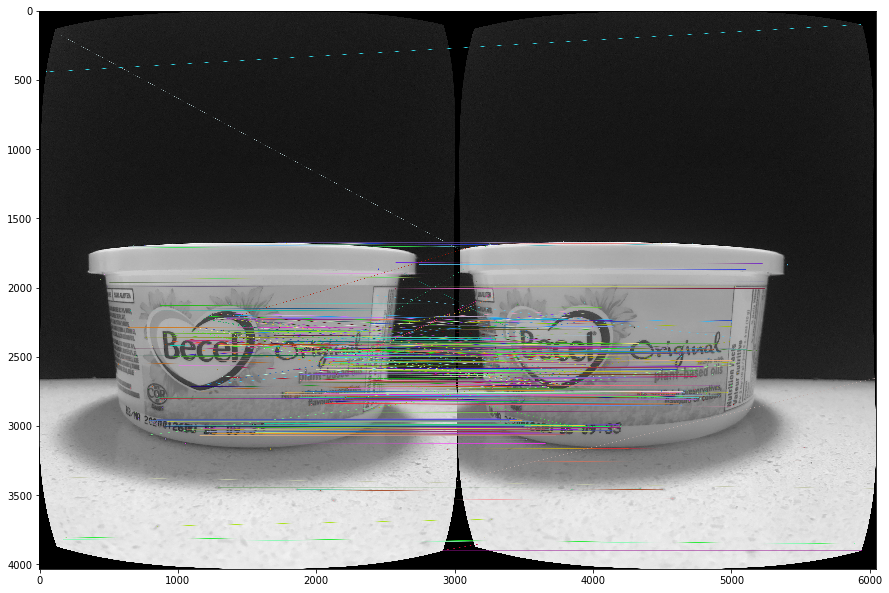

(<matplotlib.image.AxesImage at 0x14d3aed90>, None)

In [252]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

# read images
img1 = cv2.imread('images/image19/left.jpg')  
img2 = cv2.imread('images/image19/right.jpg') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
print(img1.shape)

cameraMtx = getCameraMatrix(imgL)

# imgL = downSample(imgL, 1)
# imgR = downSample(imgR, 1)

undistortedL = cv2.undistort(img1, result[0], result[1], None, cameraMtx[0])
undistortedR = cv2.undistort(img2, result[0], result[1], None, cameraMtx[0])

#sift
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(undistortedL,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(undistortedR,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)
print(len(keypoints_1))
print(descriptors_1[500])
print(matches)
img3 = cv2.drawMatches(undistortedL, keypoints_1, undistortedR, keypoints_2, matches[:500], img2, flags=2)
plt.figure(figsize = (15,15))
plt.imshow(img3),plt.show()

In [329]:
imgL = cv2.imread('images/image17/left.jpg', 0)
imgR = cv2.imread('images/image17/right.jpg', 0)

cameraMtx = getCameraMatrix(imgL)

# imgL = downSample(imgL, 1)
# imgR = downSample(imgR, 1)

undistortedL = cv2.undistort(imgL, result[0], result[1], None, cameraMtx[0])
undistortedR = cv2.undistort(imgR, result[0], result[1], None, cameraMtx[0])
mapx, mapy = cv2.initUndistortRectifyMap(cameraMtx[0], cameraMtx[1], None, newcameramtx, dim, 5)
image = cv2.remap(image, mapx, mapy, cv2.INTER_LINEAR)

x, y, w, h = roi
image = image[y:y + h, x:x + w]

NameError: name 'newcameramtx' is not defined

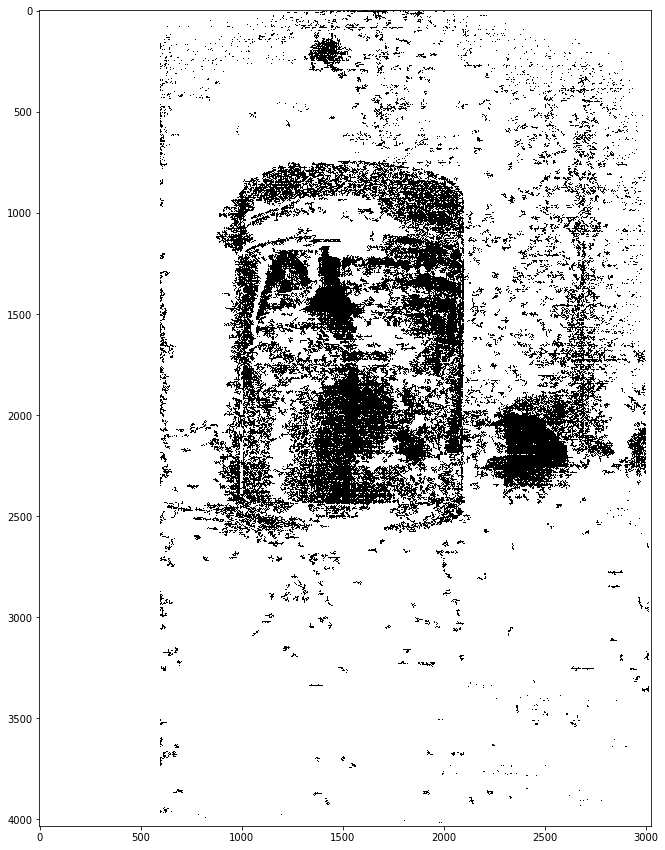

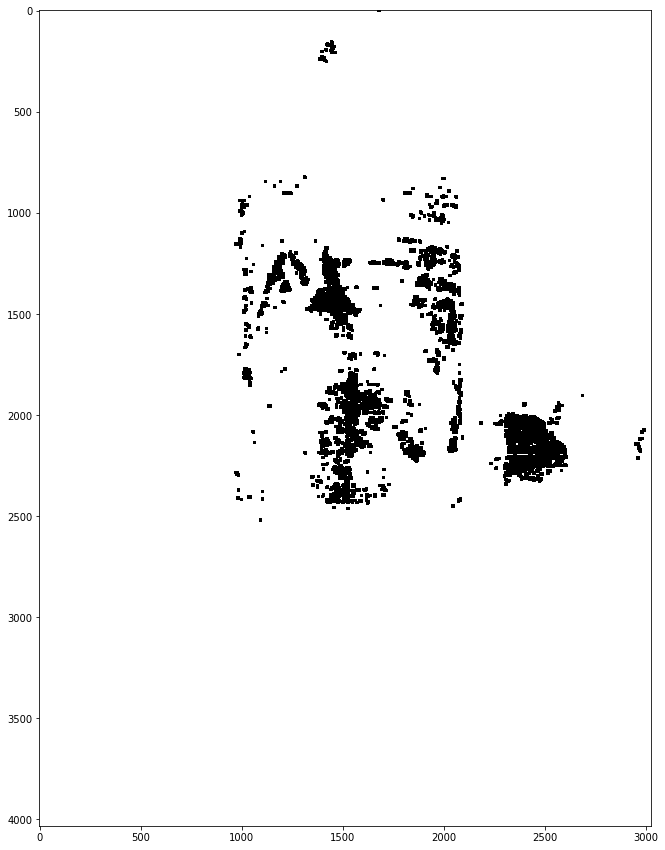

In [313]:
ret,th = cv2.threshold(stereoResult,127,255, 1)
plt.figure(figsize = (15,15))
plt.imshow(th,'gray')
plt.show()
# testtt = cv2.findContours(th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# zzz = getCountours(th, 200, 500)

kernel = np.ones((15,15),np.uint8)
dilate = cv2.morphologyEx(th, cv2.MORPH_CLOSE, kernel, 1)

# contours,hierarchy = cv2.findContours(dilate.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# test2 = cv2.erode(dilate, None, iterations = 1)
# test2 = cv2.findContours(test2.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
plt.figure(figsize = (15,15))
plt.imshow(dilate,'gray')
plt.show()

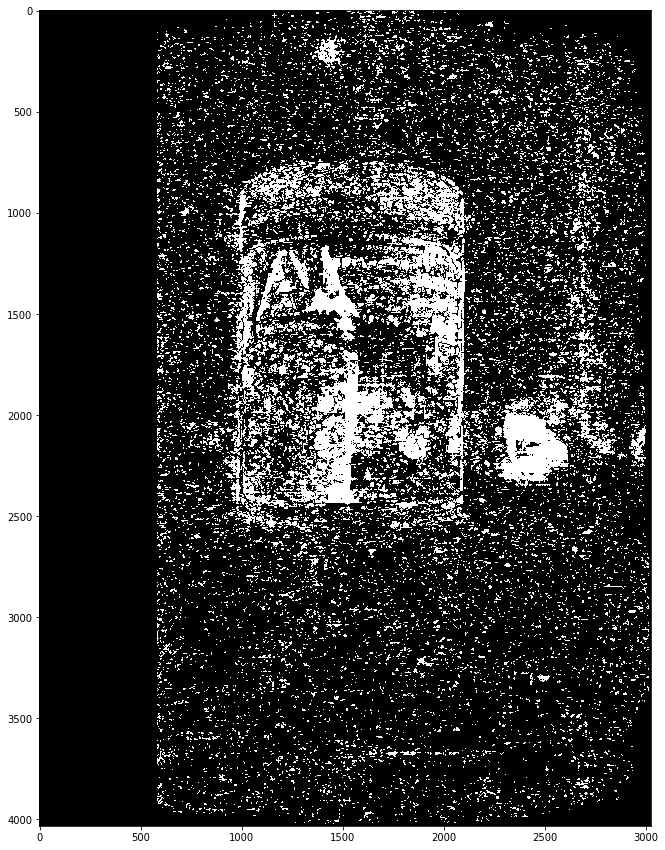

error: OpenCV(3.4.2) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/contours.cpp:199: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


In [277]:
ret,th = cv2.threshold(stereoResult,127,255, 0)
plt.figure(figsize = (15,15))
plt.imshow(th,'gray')
plt.show()
# testtt = cv2.findContours(th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# zzz = getCountours(th, 200, 500)

kernel = np.ones((15,15),np.uint8)
dilate = cv2.morphologyEx(th, cv2.MORPH_CLOSE, kernel, 1)

# contours,hierarchy = cv2.findContours(dilate.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
countours, hierarchy = cv2.findCountours()
plt.figure(figsize = (15,15))
plt.imshow(dilate,'gray')
plt.show()


In [227]:
# contours,hierarchy = cv2.findContours(dilate,2,1)
cv2.drawContours(img, contours, -1, (0,255,0), 3)

NameError: name 'img' is not defined

In [229]:
z = (cameraFocalLength*1000*10)/2002
print(z)

0.13986013986013987


In [225]:
Q2 = np.float32([[1,0,0,0],
    [0,-1,0,0],
    [0,0,cameraFocalLength*0.05,0], #Focal length multiplication obtained experimentally. 
    [0,0,0,1]])
points_3D = cv2.reprojectImageTo3D(stereoResult, Q2)
# colors = cv2.cvtColor(undistortedL, cv2.COLOR_BGR2RGB)
# mask_map = stereoResult > stereoResult.min()
# plt.figure(figsize = (15,15))
# plt.imshow(points_3D)
# plt.show()
print(points_3D.shape)
print(imgR.shape)
print(points_3D[3500][1500][2])
Z = points_3D[3500][1500][2]

# cv2.Canny(stereoResult, 200, 500)


(4032, 3024, 3)
(4032, 3024)
2.9259999


error: OpenCV(3.4.2) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/canny.cpp:947: error: (-215:Assertion failed) _src.depth() == 0 in function 'Canny'


In [216]:
import PIL.ExifTags
import PIL.Image
# imgL = cv2.imread('images/image2/left_cam.png', 0)
#Get exif data in order to get focal length. 
exif_img = PIL.Image.open('./images/image10/left.jpeg')
print(exif_img)
exif_data = {
 PIL.ExifTags.TAGS[k]:v
 for k, v in exif_img._getexif().items()
 if k in PIL.ExifTags.TAGS
}
print(exif_data)
#Get focal length in tuple form
focal_length_exif = exif_data['FocalLength']
#Get focal length in decimal form
focal_length = focal_length_exif[0]/focal_length_exif[1]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3024x4032 at 0x195D8F350>


AttributeError: 'NoneType' object has no attribute 'items'

[[20 21 22 ... 13 13 14]
 [22 23 25 ... 16 15 17]
 [18 20 22 ... 18 18 17]
 ...
 [20 19 19 ... 11 13 16]
 [19 19 18 ... 12 14 16]
 [19 19 18 ... 26 27 29]]
[]


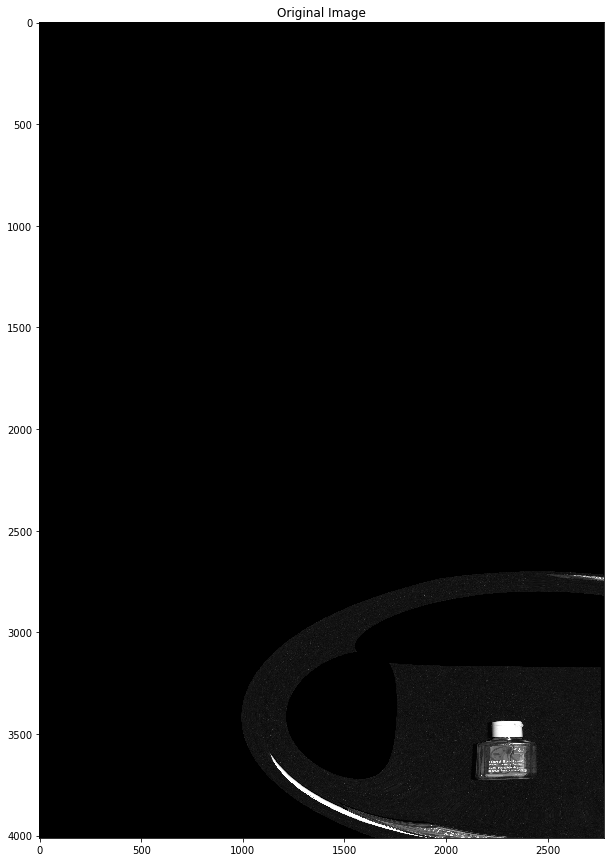

In [69]:
# undistort
imgT = cv2.imread('images/image3/left.jpg', 0)
print(imgT)
h,  w = imgT.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(result[0], result[1], (w,h), 1, (w,h))
mapx, mapy = cv2.initUndistortRectifyMap(result[0], result[1], None, newcameramtx, (w,h), 5)
dst = cv2.remap(imgT, mapx, mapy, cv2.INTER_LINEAR)
plt.figure(figsize = (15,15))
plt.imshow(dst, cmap = 'gray')
plt.title('Original Image')
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
print(dst)